In [1]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2021-11-18 14:35:22--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: 'daily-bike-share.csv.1'

     0K .......... .......... .......... .......... .......   100% 1.80M=0.03s

2021-11-18 14:35:23 (1.80 MB/s) - 'daily-bike-share.csv.1' saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [2]:
bike_data.shape

(731, 14)

<AxesSubplot:>

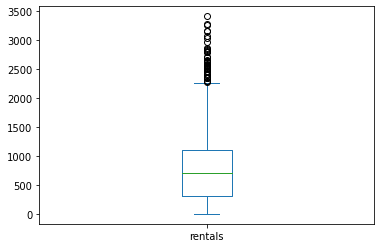

In [3]:
bike_data.rentals.plot.box()

<AxesSubplot:ylabel='Density'>

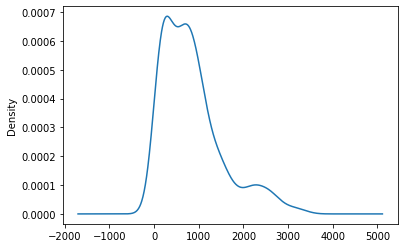

In [4]:
bike_data.rentals.plot.density()

<AxesSubplot:title={'center':'rentals'}, xlabel='weekday'>

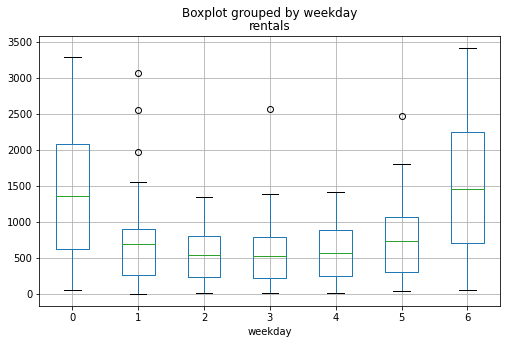

In [5]:
bike_data.boxplot(column="rentals", by="weekday", figsize=(8,5))

<AxesSubplot:ylabel='Density'>

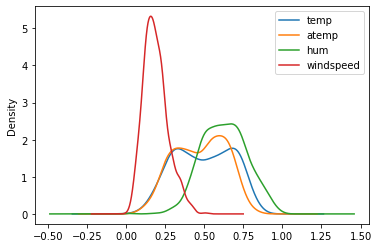

In [6]:
norm_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[norm_features].plot.density()

<AxesSubplot:xlabel='temp', ylabel='rentals'>

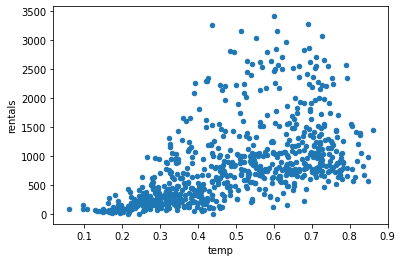

In [7]:
bike_data.plot.scatter('temp', 'rentals')

In [8]:
bike_data.temp.corr(bike_data.rentals)

0.5432846616821877

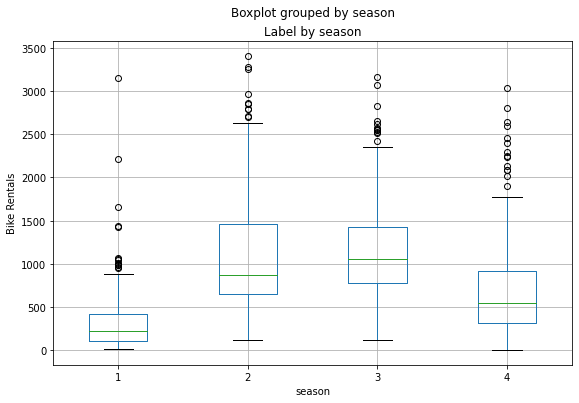

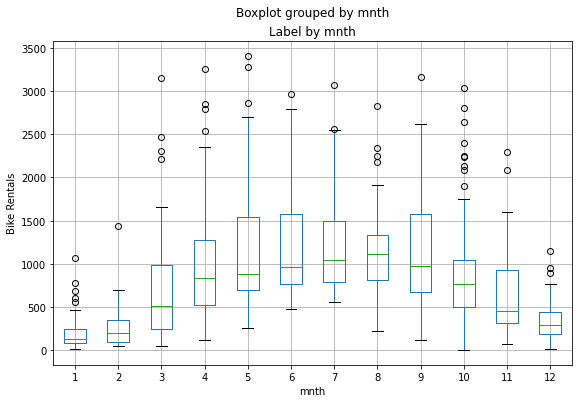

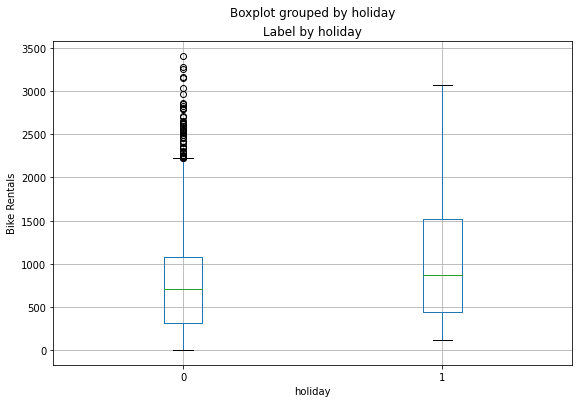

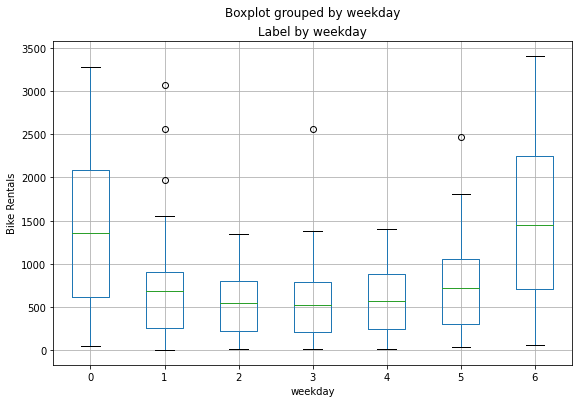

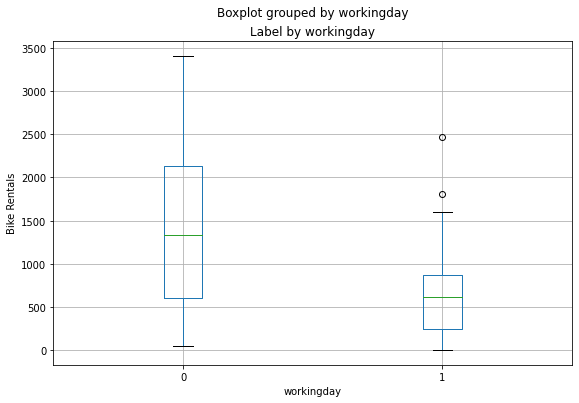

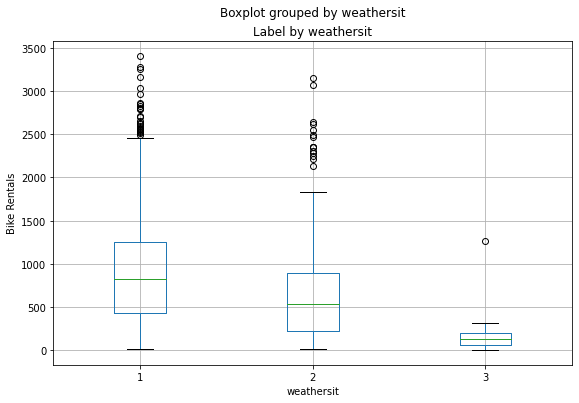

In [11]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
import matplotlib.pyplot as plt

# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

## Training the regression model

In [13]:
# Separate features and labels
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
print('Features:',X[:5], '\nLabels:', y[:5], sep='\n')

Features:
[[1.       1.       0.       6.       0.       2.       0.344167 0.363625
  0.805833 0.160446]
 [1.       1.       0.       0.       0.       2.       0.363478 0.353739
  0.696087 0.248539]
 [1.       1.       0.       1.       1.       1.       0.196364 0.189405
  0.437273 0.248309]
 [1.       1.       0.       2.       1.       1.       0.2      0.212122
  0.590435 0.160296]
 [1.       1.       0.       3.       1.       1.       0.226957 0.22927
  0.436957 0.1869  ]]

Labels:
[331 131 120 108  82]


In [14]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [18]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels [:10]): ', np.round(predictions)[:10])
print('Actual labels    [:10]): ',y_test[:10])

Predicted labels [:10]):  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels    [:10]):  [2418  754  222   47  244  145  240  555 3252   38]


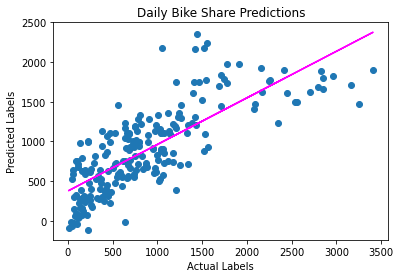

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.5594703561
RMSE: 449.41357285951665
R2: 0.6040454736919187
